<a href="https://colab.research.google.com/github/tackulus/229351/blob/main/610510531_LAB03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.ipynb (File -> Download .ipynb)

###ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: http://www.donlapark.cmustat.com/229351/data/classes.txt  
ตัวแปรต่างๆ: http://www.donlapark.cmustat.com/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: http://www.donlapark.cmustat.com/229351/data/predicate-matrix-continuous.txt

In [ ]:
#Download the files
!wget -O classes.txt http://www.donlapark.cmustat.com/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt http://www.donlapark.cmustat.com/229351/data/predicate-matrix-continuous.txt

--2020-12-17 03:59:07--  http://www.donlapark.cmustat.com/229351/data/classes.txt
Resolving www.donlapark.cmustat.com (www.donlapark.cmustat.com)... 150.107.31.67
Connecting to www.donlapark.cmustat.com (www.donlapark.cmustat.com)|150.107.31.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2020-12-17 03:59:08 (93.0 MB/s) - ‘classes.txt’ saved [755/755]

--2020-12-17 03:59:08--  http://www.donlapark.cmustat.com/229351/data/predicate-matrix-continuous.txt
Resolving www.donlapark.cmustat.com (www.donlapark.cmustat.com)... 150.107.31.67
Connecting to www.donlapark.cmustat.com (www.donlapark.cmustat.com)|150.107.31.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  29.10K  41.2KB/s    in 0.7s    

202

In [ ]:
import numpy as np

classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [ ]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data.shape

(50, 85)

####ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
####ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

In [ ]:
data_n = data - np.mean(data, axis = 0) 

#TODO: enter code here
cov = np.cov(data_n, rowvar=False)
spec = np.linalg.eigh(cov)

D, U = spec[0], spec[1].T

l_1 = D[-1] #eigenvalue ที่มีค่ารองลงมา
l_2 = D[-2] #eigenvalue ที่มีค่าสูงที่สุด

u_1 = U[-1] #eigenvector ที่มีค่า eigenvalue รองลงมา
u_2 = U[-2] #eigenvector ที่มีค่า eigenvalue สูงที่สุด
U_2 = np.c_[u_1,u_2]

proj_np = data_n@U_2
proj_np

array([[  14.33200256, -106.35992505],
       [ -58.9630861 ,   76.22681969],
       [ 170.08767172,  139.3662367 ],
       [  31.85582565,   54.04638157],
       [ -29.65753503,   11.3917049 ],
       [ -40.87859041,   10.72272289],
       [   1.17791115, -104.79228138],
       [ -82.43016284,   45.38757524],
       [ 211.92608739,   82.83737143],
       [ -90.92835147,   43.3052917 ],
       [ -58.01597662,  -35.20297112],
       [ -33.18440666,  -20.17533047],
       [-127.19955243,   92.38136512],
       [ 129.48931695,  -24.05695316],
       [-117.35250987,   89.2965802 ],
       [  28.55636713, -129.17123958],
       [ -43.49964663,   -6.27693742],
       [ 226.54893728,   95.28906181],
       [  95.64111855,  -85.05034027],
       [ -18.3316707 ,   -1.34492612],
       [  56.58550468, -120.70785352],
       [-111.97091878,   74.12827031],
       [  25.79398483, -132.31759287],
       [ 151.36316459,  100.93057781],
       [ -67.92677834,  -19.55128584],
       [ -48.25033667,  -

####ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
####พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน

In [ ]:
from sklearn.decomposition import PCA

#TODO: enter code here
data_c = data - np.mean(data, axis = 0) 
pca = PCA(n_components=2)
proj_sk = pca.fit_transform(data_c)
proj_sk

array([[  14.33200256, -106.35992505],
       [ -58.9630861 ,   76.22681969],
       [ 170.08767172,  139.3662367 ],
       [  31.85582565,   54.04638157],
       [ -29.65753503,   11.3917049 ],
       [ -40.87859041,   10.72272289],
       [   1.17791115, -104.79228138],
       [ -82.43016284,   45.38757524],
       [ 211.92608739,   82.83737143],
       [ -90.92835147,   43.3052917 ],
       [ -58.01597662,  -35.20297112],
       [ -33.18440666,  -20.17533047],
       [-127.19955243,   92.38136512],
       [ 129.48931695,  -24.05695316],
       [-117.35250987,   89.2965802 ],
       [  28.55636713, -129.17123958],
       [ -43.49964663,   -6.27693742],
       [ 226.54893728,   95.28906181],
       [  95.64111855,  -85.05034027],
       [ -18.3316707 ,   -1.34492612],
       [  56.58550468, -120.70785352],
       [-111.97091878,   74.12827031],
       [  25.79398483, -132.31759287],
       [ 151.36316459,  100.93057781],
       [ -67.92677834,  -19.55128584],
       [ -48.25033667,  -

####ในขั้นตอนสุดท้าย เราจะทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

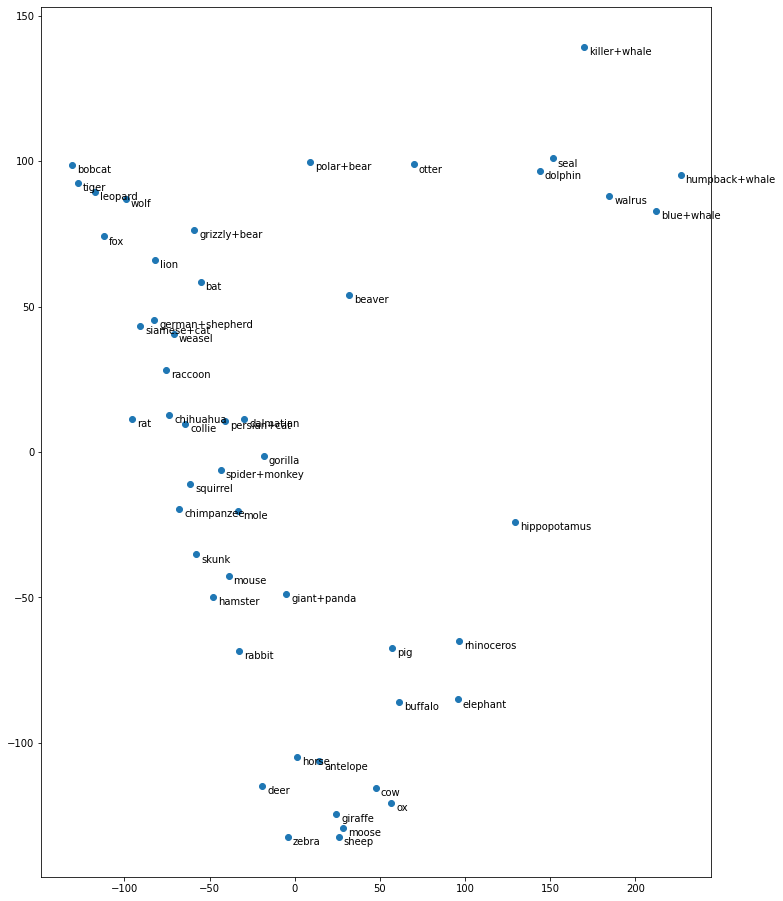

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

#กำหนดขนาดของรูป
plt.figure(figsize=(12,16)) 

#จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้ 
#รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
plt.scatter(proj_sk[:,0], proj_sk[:,1])

#for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
#ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
for i in range(50):
  plt.annotate(
          classes[i,1],
          xy=(proj_sk[i,0], 
              proj_sk[i,1]),
              xytext=(5, -8),
              textcoords='offset pixels')
  

plt.show()

####จงตอบคำถามต่อไปนี้

1. จงระบุว่าสัตว์ต่างๆ ที่อยู่มุมขวาบนมีลักษณะใดที่คล้ายคลึงกัน

        >> Marine Mammal (สัตว์เลี้ยงลูกด้วยน้ำนมทางทะเล)

2. จงระบุว่าสัตว์ต่างๆ ที่อยู่มุมซ้ายบนมีลักษณะใดที่คล้ายคลึงกัน

        >> Carnivora (สัตว์กินเนื้อ)

3. จงระบุว่าสัตว์ต่างๆ ที่อยู่ด้านล่างมีลักษณะใดที่คล้ายคลึงกัน

        >> Ungulata (สัตว์กีบ)

4. จงหาว่ามีสัตว์กลุ่มใดอีกบ้างที่มีลักษณะคล้ายกันและอยู่ใกล้ๆ กันในแผนภาพข้างบน

        >> Primates (วานร), Rodentia (สัตว์ฟันแทะ)